# Problem statement 2

Extract reviews of any product from ecommerce website like amazon 2 Perform emotion mining

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
new='https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [44]:
new

'https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [49]:
review_list=[]
for k in range(0,10):
    review_link=new+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    for i in range(0,len(reviews)):
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.in/Kindl

In [50]:
review_list

['INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles and Court judgments are in PDF( Legal documents use large font size and equal spacing, and lots of margin consuming only 10-12 lines in a page). It is better to convert them in mobi format online, and t

In [51]:
len(review_list)

10

In [52]:
nn=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth',800)
nn

,Reviews
0,"INITIAL IMPRESSIONS- Light weight and beautiful display. Easy to hold, easy to read. Thank you Vani !WHY SHOULD ONE BUY KINDLE?I was using Kindle app on smartphone and PC for quite few years, and was skeptical of investing 5859 on this mere kindle reader (books need to be purchased separately). However, this lockdown forced me to spend all my time on phone and PC, leaving strained eyes. Also, distractions(whatspp, youtube etc) is so high while reading on internet connected devices.This reader solves the problem in one go. It is light to hold for hours, and distraction free to improve your productivity to 2x-3x. Best of all, no strains on eyes means, you can carry your work for more amount of time, effectively making you productive by 4x-5x.I am a law student and all my books, articles ..."
1,"This is my best investment till date. Kindle is not a device, it's a habit and as a product manager, I'm myself amazed by the simplicity and how effortlessly it falls as your best goto device. It is built for reading at its best. Comparable to a real books with all features catered specially to book lovers."
2,It's very good
3,"I would first like to tell that I am a student of class 10th, I bought this 4 weeks ago.Why I bought this?I just wanted to build a new habit of reading, and I just made a target of reading atleast 1 book a week. I didn't want to use it to for my textbooks but wanted to see if it can handle it of not.Lets go on a detailed review.LOOK AND FEEL-The body is of plastic and has a kind of matt finish but it definitely not feel a premium gadget. It is easy to hold but some scratches at the back are visible. But thats not a problem as it still looks good. There are no scratches on the screen and I don't think there would be ever either.USER INTERFACE AND TOUCH-The overall interface is actually very bad if compared to a phone or tablet. But since it is not a replacement for tablet, but for books..."
4,"It's good product.but u can not read pdf file easily,u have to convert and all.but for e-book it's fabulous.definately go if u are reader."
5,"I was initially skeptical about resolution and size of the device. But then I was not going to spend a bomb on higher resolutions and bigger screen sizes as the source of reading is limited largely to Kindle store. And I wanted to first try if Kindle is for me not. If I am convinced, I may upgrade later.I compared the look of the screen with some of my books and it looks good. Paper quality and print quality of books vary widely ranging from glossy papers to recycled papers. I would say this device falls at range of acceptable level compared to books. So, the way it looks is fine with me.Coming to size, I did not find size of 6 inches problematic. This size is comfortable enough for reading. And the size is better than bigger sizes, for carrying it around, putting in pocket, and for si..."
6,"Using it for last 3-4 months here is my opinion about it.#Pros1.screen- there is day night difference in usual LCDs,IPS and this e-ink technology n it looks n feels absolutely like paper in daytime outdoors or with external light indoors2. UI - user interface is good consider reading guide included with it, it is easy to navigate and u can also make seperate collections for different genres of book.3. Weight - its very lightweight easily to handle u can use it without any stand or something. ( I recommend buying carry pouch instead of flip cover, flip cover indeed protectes it but also make it harder to use.)4. Dictionary/highlight/note - u have various dictionaries u just select the word meaning pops up,if not u can use Wikipedia. U can highlight text and put footnotes on them, vocabu..."
7,"Compact, easy to use. Bought it a year or so back. This is my second Kindle. First one lasted more than six years. At 5.2k (when I bought it) it was a win-win. I think it has been discontinued now. This was the best one for students — a useful product at a manageable price."
8,"WORTH EVERY PENNY!Fo

# Preprocessing

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91767\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
pp=PorterStemmer()

In [56]:
import re

In [57]:
def rvpreprocess(x):
        x=re.sub('[^a-zA-Z]'," ",x)
        x=x.lower()
        x=x.split()
        x=[word for word in x if word not in set(stopwords.words('english'))]
        x=[pp.stem(word) for word in x]
        x=" ".join(x)
        return x

In [58]:
nn["Reviews"]=nn["Reviews"].apply(rvpreprocess)

In [59]:
nn

,Reviews
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindl use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distract whatspp youtub etc high read internet connect devic reader solv problem one go light hold hour distract free improv product x x best strain eye mean carri work amount time effect make product x x law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text small box kindl data cabl length decent qualiti build qualiti plastic bodi matt finish fall hand display glass also seem good b...
1,best invest till date kindl devic habit product manag amaz simplic effortlessli fall best goto devic built read best compar real book featur cater special book lover
2,good
3,would first like tell student class th bought week ago bought want build new habit read made target read atleast book week want use textbook want see handl let go detail review look feel bodi plastic kind matt finish definit feel premium gadget easi hold scratch back visibl that problem still look good scratch screen think would ever either user interfac touch overal interfac actual bad compar phone tablet sinc replac tablet book work complet distract free environ touch actual bad pretti much job sinc turn page compar book seen book touch screen yet addit featur read time feel like paper embed rememb one rel call photofram eye strain also help read pitch dark possibl real paper hard copi book still chose read dont struggl turn page bad like call smell paper obviou choic would pick day ...
4,good product u read pdf file easili u convert e book fabul defin go u reader
5,initi skeptic resolut size devic go spend bomb higher resolut bigger screen size sourc read limit larg kindl store want first tri kindl convinc may upgrad later compar look screen book look good paper qualiti print qualiti book vari wide rang glossi paper recycl paper would say devic fall rang accept level compar book way look fine come size find size inch problemat size comfort enough read size better bigger size carri around put pocket singl hand read size devic good enough display flicker turn page problem turn set transit next page smooth even could bother turn option even trigger migrain headach passabl caus headach hour read definit put hope caus problem alway look away turn page caus problem still put experiment browser still experiment year cannot open document directli googl d...
6,use last month opinion pro screen day night differ usual lcd ip e ink technolog n look n feel absolut like paper daytim outdoor extern light indoor ui user interfac good consid read guid includ easi navig u also make seper collect differ genr book weight lightweight easili handl u use without stand someth recommend buy carri pouch instead flip cover flip cover inde protect also make harder use dictionari highlight note u variou dictionari u select word mean pop u use wikipedia u highlight text put footnot vocabulari builder word wise n x ray featur use brows bluetooth experi browser work fine usual though highli depend upon websit u visit u connect bluetooth headphon use read loud mode usabl read mobi azw txt doc n ye pdf con thing like kindl touchsreen touch okish realli smooth experi...
7,compact easi use bought year back second kindl first one last six year k bought win win think discontinu best one student use product manag price
8,worth everi penni anyon avid reader need even someon read everi good purchas talk devic screen look like actual book touch respons could better least felt everyth els alreadi mention other
9,read review peopl read book get kindl got basic version love got differ text size read comfort hold comfort read initi thought would small work fine read improv touch could bit respons exp

In [60]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


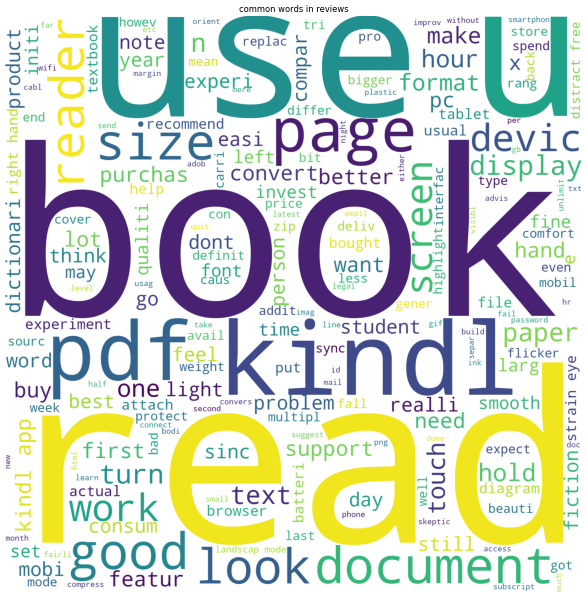

In [61]:
from wordcloud import WordCloud
wordcloud=WordCloud(height=2000,width=2000,max_words=200,background_color='white')
wordcloud=wordcloud.generate(' '.join(nn['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("common words in reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [62]:
from textblob import TextBlob
nn['sentiment_score']=nn['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
nn[['Reviews','sentiment_score']]

,Reviews,sentiment_score
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindl use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distract whatspp youtub etc high read internet connect devic reader solv problem one go light hold hour distract free improv product x x best strain eye mean carri work amount time effect make product x x law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text small box kindl data cabl length decent qualiti build qualiti plastic bodi matt finish fall hand display glass also seem good b...,0.178012
1,best invest till date kindl devic habit product manag amaz simplic effortlessli fall best goto devic built read best compar real book featur cater special book lover,0.711429
2,good,0.700000
3,would first like tell student class th bought week ago bought want build new habit read made target read atleast book week want use textbook want see handl let go detail review look feel bodi plastic kind matt finish definit feel premium gadget easi hold scratch back visibl that problem still look good scratch screen think would ever either user interfac touch overal interfac actual bad compar phone tablet sinc replac tablet book work complet distract free environ touch actual bad pretti much job sinc turn page compar book seen book touch screen yet addit featur read time feel like paper embed rememb one rel call photofram eye strain also help read pitch dark possibl real paper hard copi book still chose read dont struggl turn page bad like call smell paper obviou choic would pick day ...,0.117740
4,good product u read pdf file easili u convert e book fabul defin go u reader,0.700000
5,initi skeptic resolut size devic go spend bomb higher resolut bigger screen size sourc read limit larg kindl store want first tri kindl convinc may upgrad later compar look screen book look good paper qualiti print qualiti book vari wide rang glossi paper recycl paper would say devic fall rang accept level compar book way look fine come size find size inch problemat size comfort enough read size better bigger size carri around put pocket singl hand read size devic good enough display flicker turn page problem turn set transit next page smooth even could bother turn option even trigger migrain headach passabl caus headach hour read definit put hope caus problem alway look away turn page caus problem still put experiment browser still experiment year cannot open document directli googl d...,0.202946
6,use last month opinion pro screen day night differ usual lcd ip e ink technolog n look n feel absolut like paper daytim outdoor extern light indoor ui user interfac good consid read guid includ easi navig u also make seper collect differ genr book weight lightweight easili handl u use without stand someth recommend buy carri pouch instead flip cover flip cover inde protect also make harder use dictionari highlight note u variou dictionari u select word mean pop u use wikipedia u highlight text put footnot vocabulari builder word wise n x ray featur use brows bluetooth experi browser work fine usual though highli depend upon websit u visit u connect bluetooth headphon use read loud mode usabl read mobi azw txt doc n ye pdf con thing like kindl touchsreen touch okish realli smooth experi...,0.172427
7,compact easi use bought year back second kindl first one last six year k bought win win think discontinu best one student use product manag price,0.407143
8,worth everi penni anyon avid reader need even someon read everi good purchas talk devic screen look like actual book touch respons could better least felt everyth els alreadi mention other,0.189286
9,read review peopl read book get kindl got basic version love got differ text size read comf

In [63]:
def sentiment_category(score2):
    if(score2 >0.4):
        return 'Positive'
    elif(score2 > -0.4):
        return 'Negative'
    else:
        return 'Neutral'

In [64]:
nn['sentiment']=nn['sentiment_score'].apply(lambda x:sentiment_category(x))

In [65]:
nn

,Reviews,sentiment_score,sentiment
0,initi impress light weight beauti display easi hold easi read thank vani one buy kindl use kindl app smartphon pc quit year skeptic invest mere kindl reader book need purchas separ howev lockdown forc spend time phone pc leav strain eye also distract whatspp youtub etc high read internet connect devic reader solv problem one go light hold hour distract free improv product x x best strain eye mean carri work amount time effect make product x x law student book articl court judgment pdf legal document use larg font size equal space lot margin consum line page better convert mobi format onlin transfer page document read landscap mode howev advis buy pdf read text small box kindl data cabl length decent qualiti build qualiti plastic bodi matt finish fall hand display glass also seem good b...,0.178012,Negative
1,best invest till date kindl devic habit product manag amaz simplic effortlessli fall best goto devic built read best compar real book featur cater special book lover,0.711429,Positive
2,good,0.700000,Positive
3,would first like tell student class th bought week ago bought want build new habit read made target read atleast book week want use textbook want see handl let go detail review look feel bodi plastic kind matt finish definit feel premium gadget easi hold scratch back visibl that problem still look good scratch screen think would ever either user interfac touch overal interfac actual bad compar phone tablet sinc replac tablet book work complet distract free environ touch actual bad pretti much job sinc turn page compar book seen book touch screen yet addit featur read time feel like paper embed rememb one rel call photofram eye strain also help read pitch dark possibl real paper hard copi book still chose read dont struggl turn page bad like call smell paper obviou choic would pick day ...,0.117740,Negative
4,good product u read pdf file easili u convert e book fabul defin go u reader,0.700000,Positive
5,initi skeptic resolut size devic go spend bomb higher resolut bigger screen size sourc read limit larg kindl store want first tri kindl convinc may upgrad later compar look screen book look good paper qualiti print qualiti book vari wide rang glossi paper recycl paper would say devic fall rang accept level compar book way look fine come size find size inch problemat size comfort enough read size better bigger size carri around put pocket singl hand read size devic good enough display flicker turn page problem turn set transit next page smooth even could bother turn option even trigger migrain headach passabl caus headach hour read definit put hope caus problem alway look away turn page caus problem still put experiment browser still experiment year cannot open document directli googl d...,0.202946,Negative
6,use last month opinion pro screen day night differ usual lcd ip e ink technolog n look n feel absolut like paper daytim outdoor extern light indoor ui user interfac good consid read guid includ easi navig u also make seper collect differ genr book weight lightweight easili handl u use without stand someth recommend buy carri pouch instead flip cover flip cover inde protect also make harder use dictionari highlight note u variou dictionari u select word mean pop u use wikipedia u highlight text put footnot vocabulari builder word wise n x ray featur use brows bluetooth experi browser work fine usual though highli depend upon websit u visit u connect bluetooth headphon use read loud mode usabl read mobi azw txt doc n ye pdf con thing like kindl touchsreen touch okish realli smooth experi...,0.172427,Negative
7,compact easi use bought year back second kindl first one last six year k bought win win think discontinu best one student use product manag price,0.407143,Positive
8,worth everi penni anyon avid reader need even someon read everi good purchas talk devic screen look like actual book touch respons could better least felt everyth els alreadi mention other,0.189286,Negative
9,

# Calcucating the category of sentiments and their value counts

In [66]:
nn['sentiment'].value_counts()

Negative    6
Positive    4
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

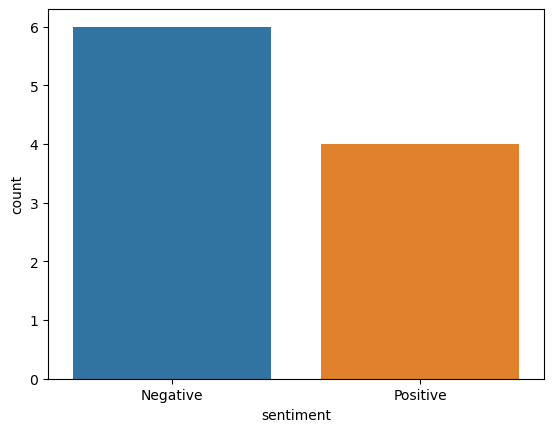

In [67]:
sns.countplot(x=nn['sentiment'])